### ANN - Iris
    - TensorFlow & Keras
    - 3 class (Multi-class Classification)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In [2]:
df = sns.load_dataset('iris')
df.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

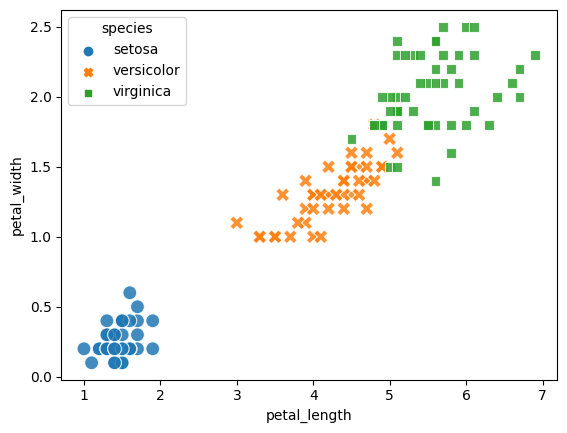

In [4]:
sns.scatterplot(x = 'petal_length', y='petal_width', data=df, hue='species', style='species',
                alpha=0.85, edgecolor='w', s=100)

plt.show()

In [5]:
class_names = np.unique(df.species)
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### X and y

In [6]:
X = df.drop(['species'], axis=1)
X.sample(6, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6


In [7]:
X[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df.species

In [9]:
y[:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

### Train-test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [12]:
y_train.shape, y_test.shape

((112,), (38,))

In [13]:
y_train[:5]

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [14]:
y_test[:5]

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: species, dtype: object

### One-Hot Encoding

In [15]:
from tensorflow.keras.utils import to_categorical

def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    print(categories)
    return to_categorical(ids, len(categories))
    
y_train_1h = one_hot_encode(y_train).astype('int')
y_test_1h = one_hot_encode(y_test).astype('int')

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [16]:
y_train_1h[:4]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [17]:
y_test_1h[:4]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [18]:
y_train_1h.shape, y_test_1h.shape

((112, 3), (38, 3))

In [19]:
X_train[:4]

array([[ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 1.03800476, -1.28296331,  1.16062026,  0.79067065],
       [ 1.15917263, -0.13197948,  0.99010798,  1.18556721],
       [-0.90068117,  1.01900435, -1.34022653, -1.18381211]])

In [20]:
y_train[:4]

54     versicolor
108     virginica
112     virginica
17         setosa
Name: species, dtype: object

In [21]:
y_train_1h[:4]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

### Model
    - Create a Model
    - Compile
    - Train

### Create a Model

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()

hidden_node = 64
model.add(Dense(hidden_node, activation='relu', input_shape=(4,)))

model.add(Dense(3, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.output_shape

(None, 3)

### Compile and Train

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
import time

start = time.time()
history = model.fit(X_train, y_train_1h, epochs=80, batch_size=8, verbose=1, validation_split=0.25)
end = time.time()

print(f"Time Taken {end - start:.3f} secs")

Epoch 1/80
11/11 [==============================] - 2s 57ms/step - loss: 0.9993 - accuracy: 0.5238 - val_loss: 0.9925 - val_accuracy: 0.5000
Epoch 2/80
11/11 [==============================] - 0s 9ms/step - loss: 0.8633 - accuracy: 0.7381 - val_loss: 0.9014 - val_accuracy: 0.5357
Epoch 3/80
11/11 [==============================] - 0s 9ms/step - loss: 0.7501 - accuracy: 0.7500 - val_loss: 0.8282 - val_accuracy: 0.5357
Epoch 4/80
11/11 [==============================] - 0s 10ms/step - loss: 0.6601 - accuracy: 0.7500 - val_loss: 0.7652 - val_accuracy: 0.5714
Epoch 5/80
11/11 [==============================] - 0s 9ms/step - loss: 0.5891 - accuracy: 0.7857 - val_loss: 0.7152 - val_accuracy: 0.6429
Epoch 6/80
11/11 [==============================] - 0s 9ms/step - loss: 0.5309 - accuracy: 0.7976 - val_loss: 0.6722 - val_accuracy: 0.6429
Epoch 7/80
11/11 [==============================] - 0s 9ms/step - loss: 0.4860 - accuracy: 0.8095 - val_loss: 0.6384 - val_accuracy: 0.6786
Epoch 8/80
11/11 [

### Evaluate

In [27]:
score = model.evaluate(X_test, y_test_1h, verbose=0)

print("Test loss", score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss 0.09480320662260056
Test accuracy : 0.9737


In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

2/2 [==============================] - 0s 10ms/step


array([[0.998, 0.002, 0.   ],
       [0.092, 0.894, 0.014],
       [0.005, 0.947, 0.047],
       [0.999, 0.001, 0.   ]], dtype=float32)

In [30]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([0, 1, 1, 0], dtype=int64)

In [31]:
y_test[:4]

14        setosa
98    versicolor
75    versicolor
16        setosa
Name: species, dtype: object

In [32]:
_, y_test_enc = np.unique(y_test, return_inverse=True)
y_test_enc[:4]

array([0, 1, 1, 0], dtype=int64)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_enc, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test_enc, y_pred_cat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


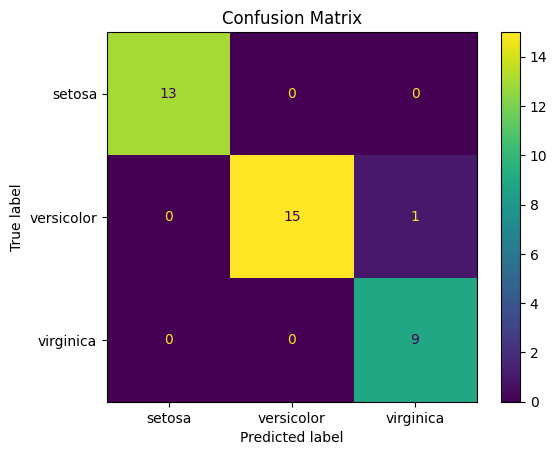

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_enc, y_pred_cat)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

### Loss and Accuracy Curves

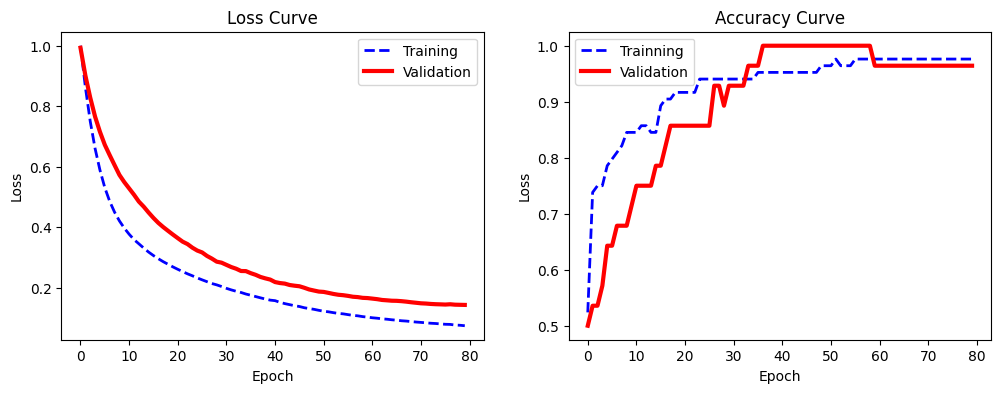

In [35]:
# 2 Columns
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Training')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
plt.title('Loss Curve')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2) #row column
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

### Predict

In [36]:
X_new = [[8.1, 4.0, 5.9, 2.1],
         [6.8, 3.6, 3.5, 1.4]]

X_new_sc = sc.transform(X_new)
X_new_sc

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.73435494,  2.16998818,  1.21745768,  1.18556721],
       [ 1.15917263,  1.24920112, -0.14664056,  0.26414192]])

In [37]:
y_pred_pr = model.predict(X_new_sc)
y_pred_pr.round(3)

1/1 [==============================] - 1s 530ms/step


array([[0.004, 0.349, 0.647],
       [0.063, 0.918, 0.019]], dtype=float32)

In [38]:
y_pred = np.argmax(y_pred_pr, axis=1)
y_pred

array([2, 1], dtype=int64)

In [39]:
print(class_names[y_pred])

['virginica' 'versicolor']


### Decision Region

In [40]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model
    
    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)

In [42]:
from mlxtend.plotting import plot_decision_region

value = 0
width = 5.5

ax = plot_decision_region(X_test, np.array(y_test_enc),
                          
                          clf=model_no_ohe, feature_index=[2, 3],
                          filler_feature_values={0: value, 1: value},
                          filler_feature_ranges={0: width, 1: width},
                          legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Iris (Hidden={})'.format(hidden_node))

plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_new_sc[:,2][y_pred==0], X_new_sc[:,3][y_pred==0], marker='s', s=180, c='b')
plt.scatter(X_new_sc[:,2][y_pred==1], X_new_sc[:,3][y_pred==1], marker='^', s=230, c='#7d4128')
plt.scatter(X_new_sc[:,2][y_pred==2], X_new_sc[:,3][y_pred==2], marker='o', s=150, c='b')

ImportError: cannot import name 'plot_decision_region' from 'mlxtend.plotting' (c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\__init__.py)